# Machine Learning Overview

## Motivation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set_theme(style="whitegrid")

%matplotlib inline

Let's consider the famous wine dataset by [P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis, 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016). It consists of two datasets related to red and white variants of the __*Portuguese*__ _"Vinho Verde"_ wine, each one with 11 attributes. tThe target is the quality of the wine based on sensory data and it is a score between 0 and 10.   

In [2]:
data_filepath = "https://raw.githubusercontent.com/aoguedao/neural_computing_workshop/main/data/winequality-red.csv"
# data_filepath = Path().resolve().parent / "data" / "winequality-red.csv"  # If you are running locally
data = pd.read_csv(data_filepath, sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


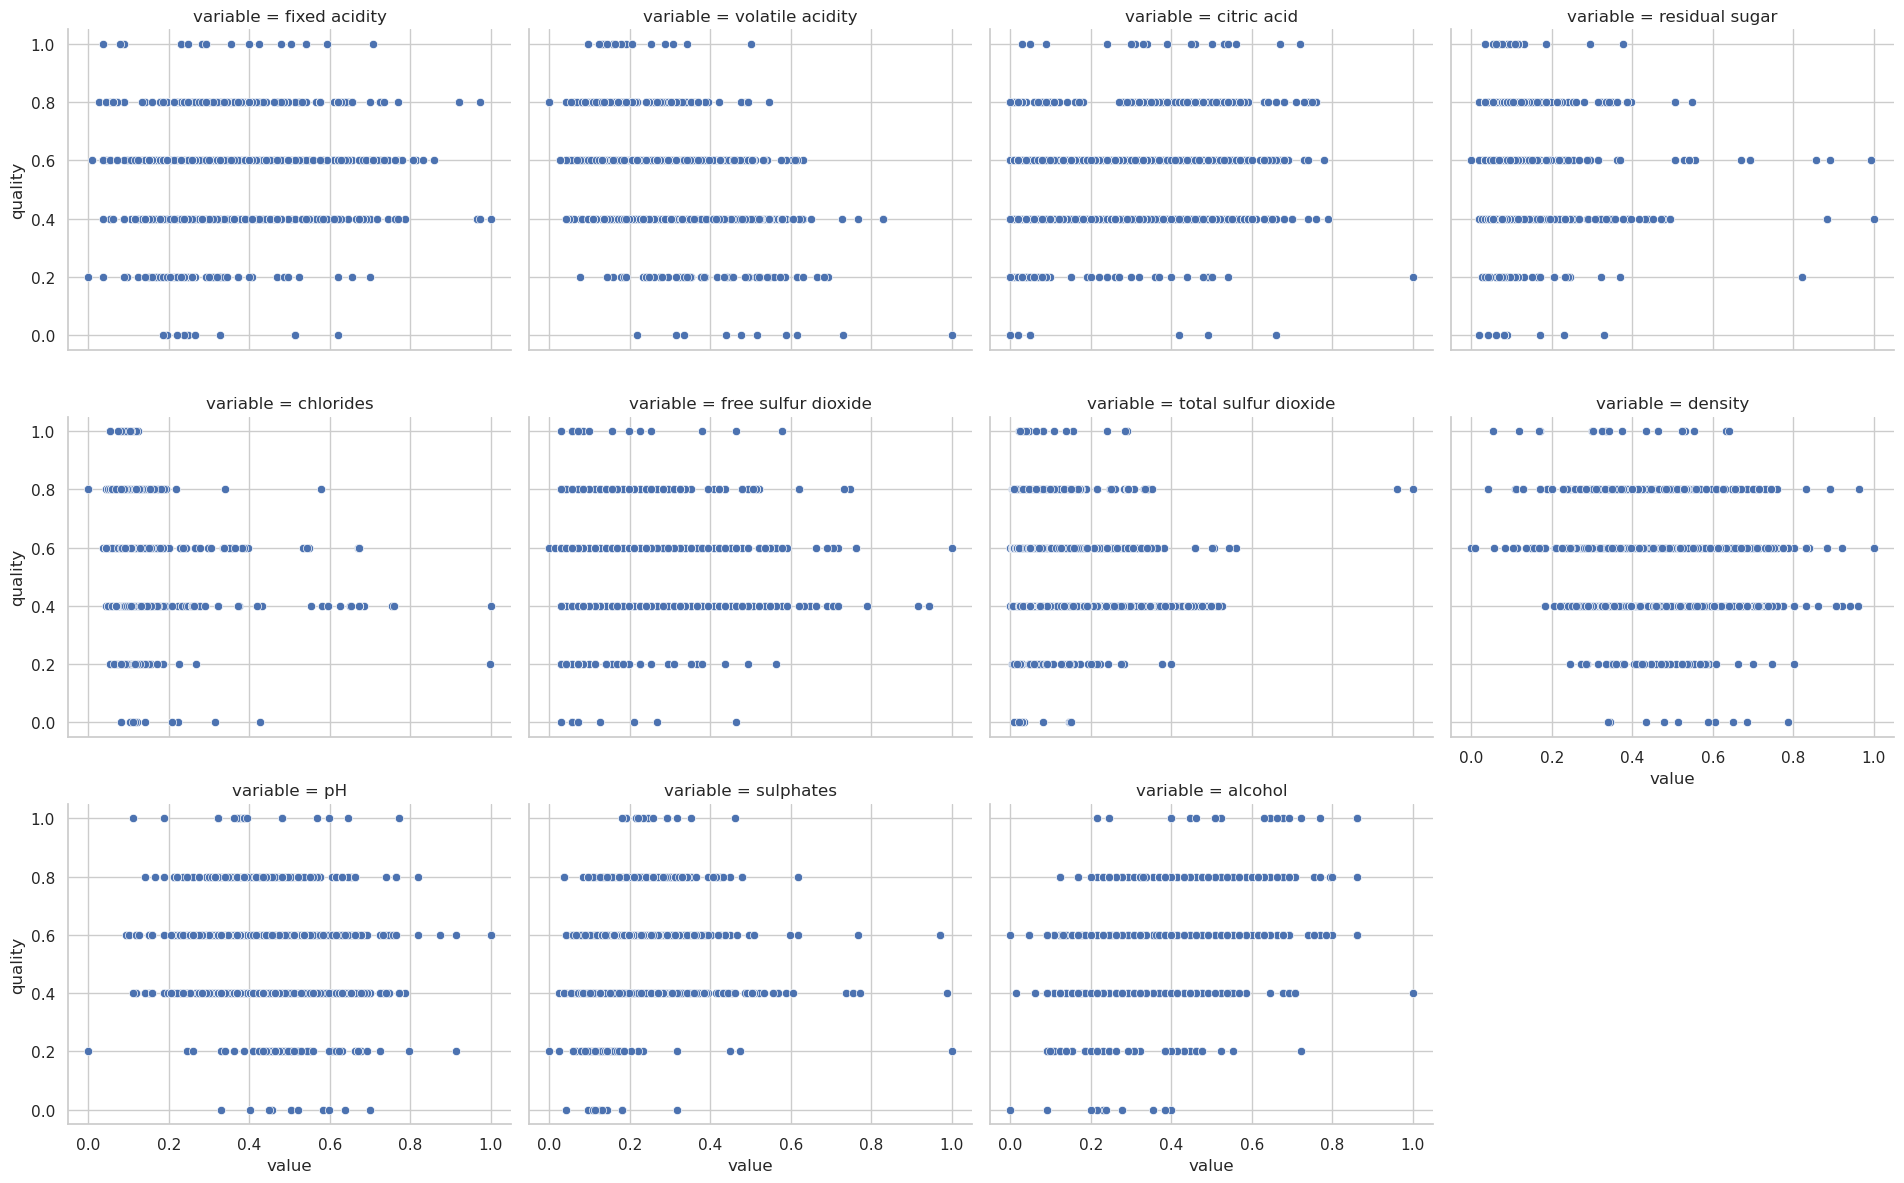

In [3]:
normalized_data = (data - data.min()) / (data.max() - data.min())
sns.relplot(
    data=normalized_data.melt(id_vars="quality"),
    kind="scatter",
    x="value",
    y="quality",
    col="variable",
    col_wrap=4,
    height=4,
    aspect=1.2,
)


A typical problem would be to predict the quality of a new wine, either through its score or a classification as good/bad wine. 

__*Can we come out with a mathematical model for predicting/classifing wine without specific rules?*__

## Modeling

Suppose that we observe a quantitative response $y$ and $p$ different predictors, $ X_1, X_2, \ldots, X_p$. We assume that there is some relationship between $Y$ and $X = (X_1, X_2,  \ldots , X_p)$, which can be written in the very general form
$$
y = f(X) + \epsilon
$$
Here $f$ is some fixed but unknown function of $X$, and $\epsilon$ is a random error term, which is independent of $X$ and has mean zero.

## Prediction

In many situations, a set of inputs $X$ are readily available, but the output $y$ cannot be easily obtained. In this setting, since the error term averages to zero, we can predict $y$ using
$$
\hat{y} = \hat{f}(X),
$$
where $\hat{f}$ represents our estimate for $f$, and $\hat{y}$ represents the resulting prediction for $Y$ . In this setting, $\hat{f}$ is often treated as a __black-box__, in the sense
that one is not typically concerned with the exact form of $\hat{f}$, provided that it yields accurate predictions for $y$.

## Estimation

Now the natural question is: _How do we estimate $f$?_

In this workshop we will study several techniques and algorithms, but generally speaking, the idea is to take the observed data for a _learning_ process. These observations are called __Training Data__, because we will use these training observations to train, or teach, our method how to estimate $f$. In other words, we are looking for
$$
y \approx \hat{f}(X)
$$

Broadly speaking, most statistical learning methods for this task can be characterized as either _parametric_ or _non-parametric_. Parametric models make assumptions about the functional form or shape of $f$ in order to reduce the searching space. A typical example is Linear Regression, where we will need to estimate/fit/train only a few coefficients. On the other hand, non-parametric models do not make explicit assumptions about f, instead they seek an estimate of f that gets as close to the data points as possible. As you can imagine, the parametric models can be very interpretable and non-parametric models can be more accurate. It is important to select an adequate model depending on the trade-off between prediction and interpretability we need.

![Complexity Interpretability](../images/complexity_interpretability.gif)

[Image Source](https://ieeexplore.ieee.org/document/8844682/figures#figures)

Most classical machine learning problems fall into one of two categories: _supervised_ or _unsupervised_. The example with the wine dataset is supervised, since we have labels for each sample. If these labels are numeric (score of wine quality) we are in a __Regression__ model; however, if labels are categories (good/bad quality), it is called a __Classification__ model.

By contrast, unsupervised learning describes a more challenging situation where observations do not have any label. The situation is referred to as unsupervised because we lack a response variable that can supervise our analysis. A classical example is a __Clustering__ model, when the goal is to find relationships between samples and create groups.

## Assessing Model Accuracy

In order to evaluate the performance of a model on a given data set, we need some way to measure how well its predictions actually match the observed data.

Let's define the concept of __*Metric*__, as such functions can explain the performance of a model.

The choice of metric completely depends on the type of model and the implementation plan of the model.

### Regression Metrics

We know that target values of regression models are numeric (usually continuous) values. Then we can use metrics based on normed spaces or something similar.

#### R² score, the coefficient of determination


It is the proportion of the variation in the dependent variable that is predictable from the independent variables. It provides an indication of goodness of fit, and therefore a measure of how well unseen samples are likely to be predicted by the model through the proportion of explained variance.

If $\hat{y}_i = \hat{f}(x_i)$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value, then the coefficient of determination is defined as:

$$
R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^n \left( y_i - \hat{y}_i\right)^2}{\sum_{i=1}^n \left( y_i - \bar{y}_i\right)^2}
= 1 - \frac{\sum_{i=1}^n e_i^2}{\sum_{i=1}^n \left( y_i - \bar{y}_i\right)^2}
$$

where $n$ is the total of samples, $y = \tfrac{1}{n} \sum_{i=1}^n y_i$ (the mean value).

Since we can define the residuals as $e_i = y_i - \hat{y}_i$ is isual to read in literature the analogous definition

$$
R^2(y, \hat{y})  = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

where $SS_{\text{res}} = \sum_{i=1}^n \left( y_i - \hat{y}_i\right)^2 = \sum_{i=1}^n e_i^2$ is called the _residual sum of squares_ and $SS_{\text{tot}} = \sum_{i=1}^n \left( y_i - \bar{y}_i\right)^2$ is the _total sum of squares_.


Note that the best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected (average) value of $y$, disregarding the input features, would get an  score of 0.0.

#### Mean squared error

The mean square error corresponds to the expected value of the squared (quadratic) error or $\ell_2$ - norm loss. It is defined as 

$$
MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2
$$

#### Mean absolute error

The mean absolute error corresponds to the expected value of the absolute error or $\ell_1$-norm loss. It is defined as

$$
MAE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n \left\lvert y_i - \hat{y}_i \right\rvert
$$

### Classification Metrics

In order to measure a classification model we need different types of metrics, since we are working with categories. Before defining metrics, we will introduce a very useful tool for classification tasks.

#### Confusion Matrix

A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class, or vice versa – both variants are found in literature. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another). [- Source -](https://en.wikipedia.org/wiki/Confusion_matrix)

For a binary classification problem a confusion matrix looks like this:

![confusion_matrix](../images/confusion_matrix.png)

Initially, the aim is to maximize the sum of the well-classified elements, however, this depends on the problem to be solved.

#### Accuracy

$$\textrm{accuracy}= \frac{TP+TN}{TP+TN+FP+FN}$$

#### Recall

$$\textrm{recall} = \frac{TP}{TP+FN}$$

#### Precision

$$\textrm{precision} = \frac{TP}{TP+FP} $$

#### F-Score

$$\text{F-score} = 2\times \frac{  \textrm{precision} \times \textrm{recall} }{  \textrm{precision} + \textrm{recall} } $$

Let's take for example a really bad model for the wine dataset. Consider a random predictor between the minimum and the maximum wine quaility.

In [4]:
def random_model(X, target):
    values = X[target]
    min_target = values.min()
    max_target = values.max()
    return np.random.uniform(low=min_target, high=max_target, size=X.shape[0])


We can compute any metric with a few lines of code.

In [5]:
from sklearn.metrics import mean_squared_error

y_true = data["quality"]
y_pred = random_model(data, "quality")
mean_squared_error(y_true, y_pred)

2.7120489387905935

Is this a good model?

Answer:

![box](../images/box.jpg)